# EarthDaily datacube : Agro Cloud Mask and native mask with Sentinel-2 images comparison

> 👋 Before moving on with this demo, you must first sign-up and request your Geosys APIs credentials here :
> - ⚙️[Try it now](https://www.earthdaily.com/geosys/geosys-api/)

> For more information about our Geosys APIs : 
> - 📚 [Geosys APIs to connect with your digital ag application](https://www.earthdaily.com/geosys/geosys-api/)


> **Demo Project:** This demo demonstrates the ability to create an Analytics Datacube of CLEAR images based on geosysPy



### @author: Geosys



 ## 1️⃣ Import all librairies needed and get an autorization to use Analytics Datacube

In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
from geosyspy.utils.constants import *
from dotenv import load_dotenv
import logging
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

# read .env file
load_dotenv()

import xarray as xr
import matplotlib.pyplot as plt
import xarray as xr
import zarr
from azure.storage.blob import ContainerClient

## 2️⃣ Retrieve the datacubes from the blob storage

In [2]:
account_storage = os.getenv('AZURE_ACCOUNT_NAME')
account_url = f'https://{account_storage}.blob.core.windows.net'
container_name = os.getenv('AZURE_BLOB_CONTAINER_NAME')
prefix = '2019-04-01_2019-06-30_entity_agro_cloud_sentinel-2-l2a_datacube.zarr'
credential = os.getenv('AZURE_SAS_CREDENTIAL')

container_client = ContainerClient(account_url=account_url, container_name=container_name, credential=credential)
store = zarr.ABSStore(client=container_client, prefix=prefix)
cube_ACM = xr.open_zarr(store=store, consolidated=True)

In [3]:
account_storage = os.getenv('AZURE_ACCOUNT_NAME')
account_url = f'https://{account_storage}.blob.core.windows.net'
container_name = os.getenv('AZURE_BLOB_CONTAINER_NAME')
prefix = '2019-04-01_2019-06-30_entity_native_cloud_sentinel-2-l2a_datacube.zarr'
credential = os.getenv('AZURE_SAS_CREDENTIAL')

container_client = ContainerClient(account_url=account_url, container_name=container_name, credential=credential)
store = zarr.ABSStore(client=container_client, prefix=prefix)
cube_native= xr.open_zarr(store=store, consolidated=True)

## 3️⃣ Plot the NDVI rasters by dates for the native cloud mask and the agro cloud mask

In [4]:
def NDVI(red,nir):
    return((nir - red)/(nir + red))

In [5]:
dates_native=[]
NDTIs_native=[]
for date,cube_date in cube_native.groupby('time'):
    NDTIs_native.append(NDVI(cube_date.red,cube_date.nir08))
    dates_native.append(date)
print(len(NDTIs_native))

5


In [6]:
dates_ACM=[]
NDTIs_ACM=[]
for date,cube_date in cube_ACM.groupby('time'):
    NDTIs_ACM.append(NDVI(cube_date.red,cube_date.nir08))
    dates_ACM.append(date)
print(len(NDTIs_ACM))

3


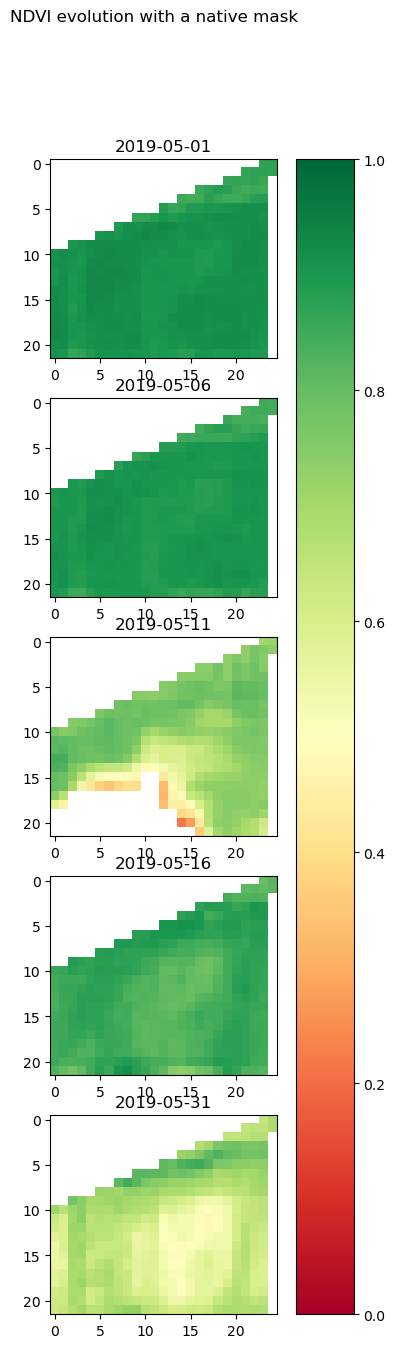

In [7]:
import matplotlib as mpl


fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(5, 15))
fig.suptitle('NDVI evolution with a native mask')
i=0
for ax in axes.flat:
    ax.set_title(str(dates_native[i])[0:10])
    im = ax.imshow(NDTIs_native[i],vmin=0.0,vmax=1,cmap='RdYlGn')
    i+=1
    
cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
plt.colorbar(im, cax=cax, fraction=0.046, pad=0.04)

plt.show()

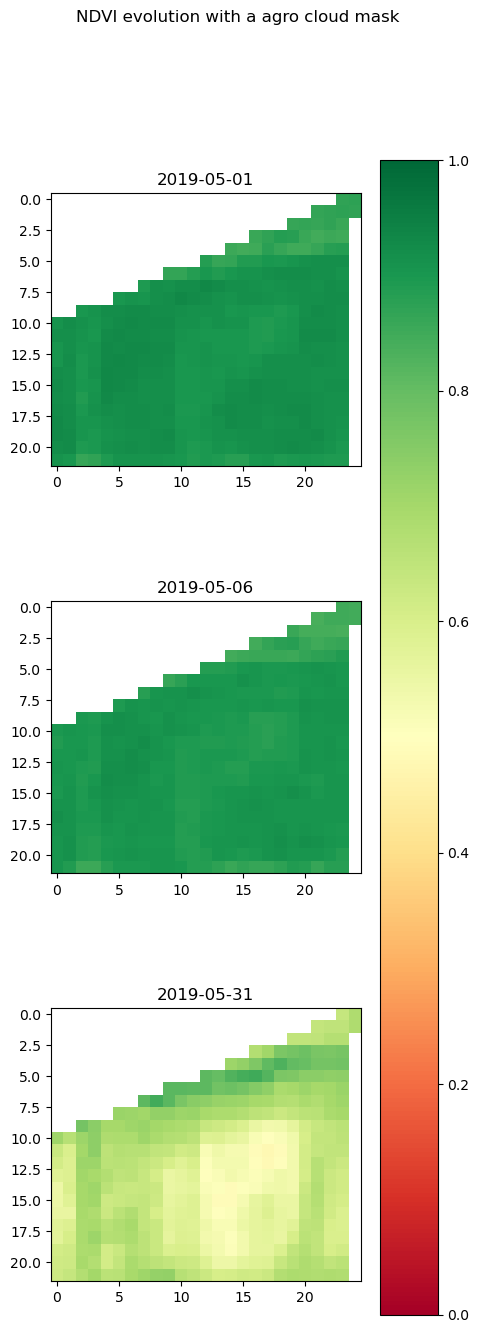

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(5, 15))
fig.suptitle('NDVI evolution with a agro cloud mask')
i=0
for ax in axes.flat:
    ax.set_title(str(dates_ACM[i])[0:10])
    im = ax.imshow(NDTIs_ACM[i],vmin=0.0,vmax=1,cmap='RdYlGn')
    i+=1
    
cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
plt.colorbar(im, cax=cax, fraction=0.046, pad=0.04)

plt.show()

## 4️⃣ RGB image of a cloudy day

The Agro cloud mask allowed to detect more cloudy days than the native mask. For example, on May 11th 2019, the field was partially covered with clouds, not detected by the native cloud mask but detected by our mask.

c:\Users\lwh\.conda\envs\mamba-env\envs\stackfox-processor\lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


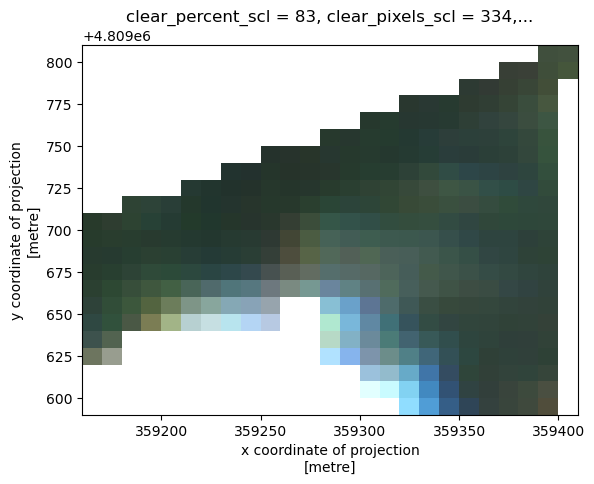

In [9]:
cube_native.sel(time='2019-05-11T00:00:00.000000000')[["red", "green", "blue"]].to_array(
    dim="band"
).plot.imshow(vmin=0, vmax=0.2)